# Iris Visualization

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

sys.path.append("..")

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
from IPython.display import display, HTML

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.set_option('display.max_rows', None)


Select the Imput File

In [2]:
input_file = "../data/iris.data"

Create a DataFrame using an ifered schema 

In [3]:
# load data file.
# create a DataFrame using an ifered Schema 
df = pd.read_csv(input_file, names=["sepal length","sepal width","petal length","petal width", "label"]) 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## Plot the data

In [4]:
display(df)

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Bar Charts

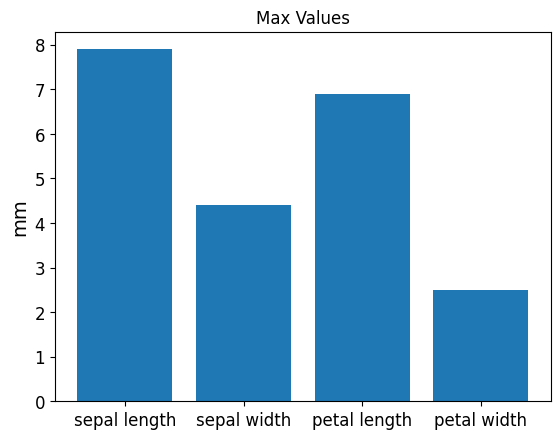

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
s_max = df[['sepal length','sepal width','petal length','petal width']].max()
#s_max = df.iloc[0:,0:4].max()
plt.bar(range(len(s_max.index)),s_max.values)
plt.title("Max Values")
plt.ylabel("mm")
plt.xticks(range(len(s_max.index)),s_max.index)
plt.show()

### Box Plots

Saving figure attribute_box_plots


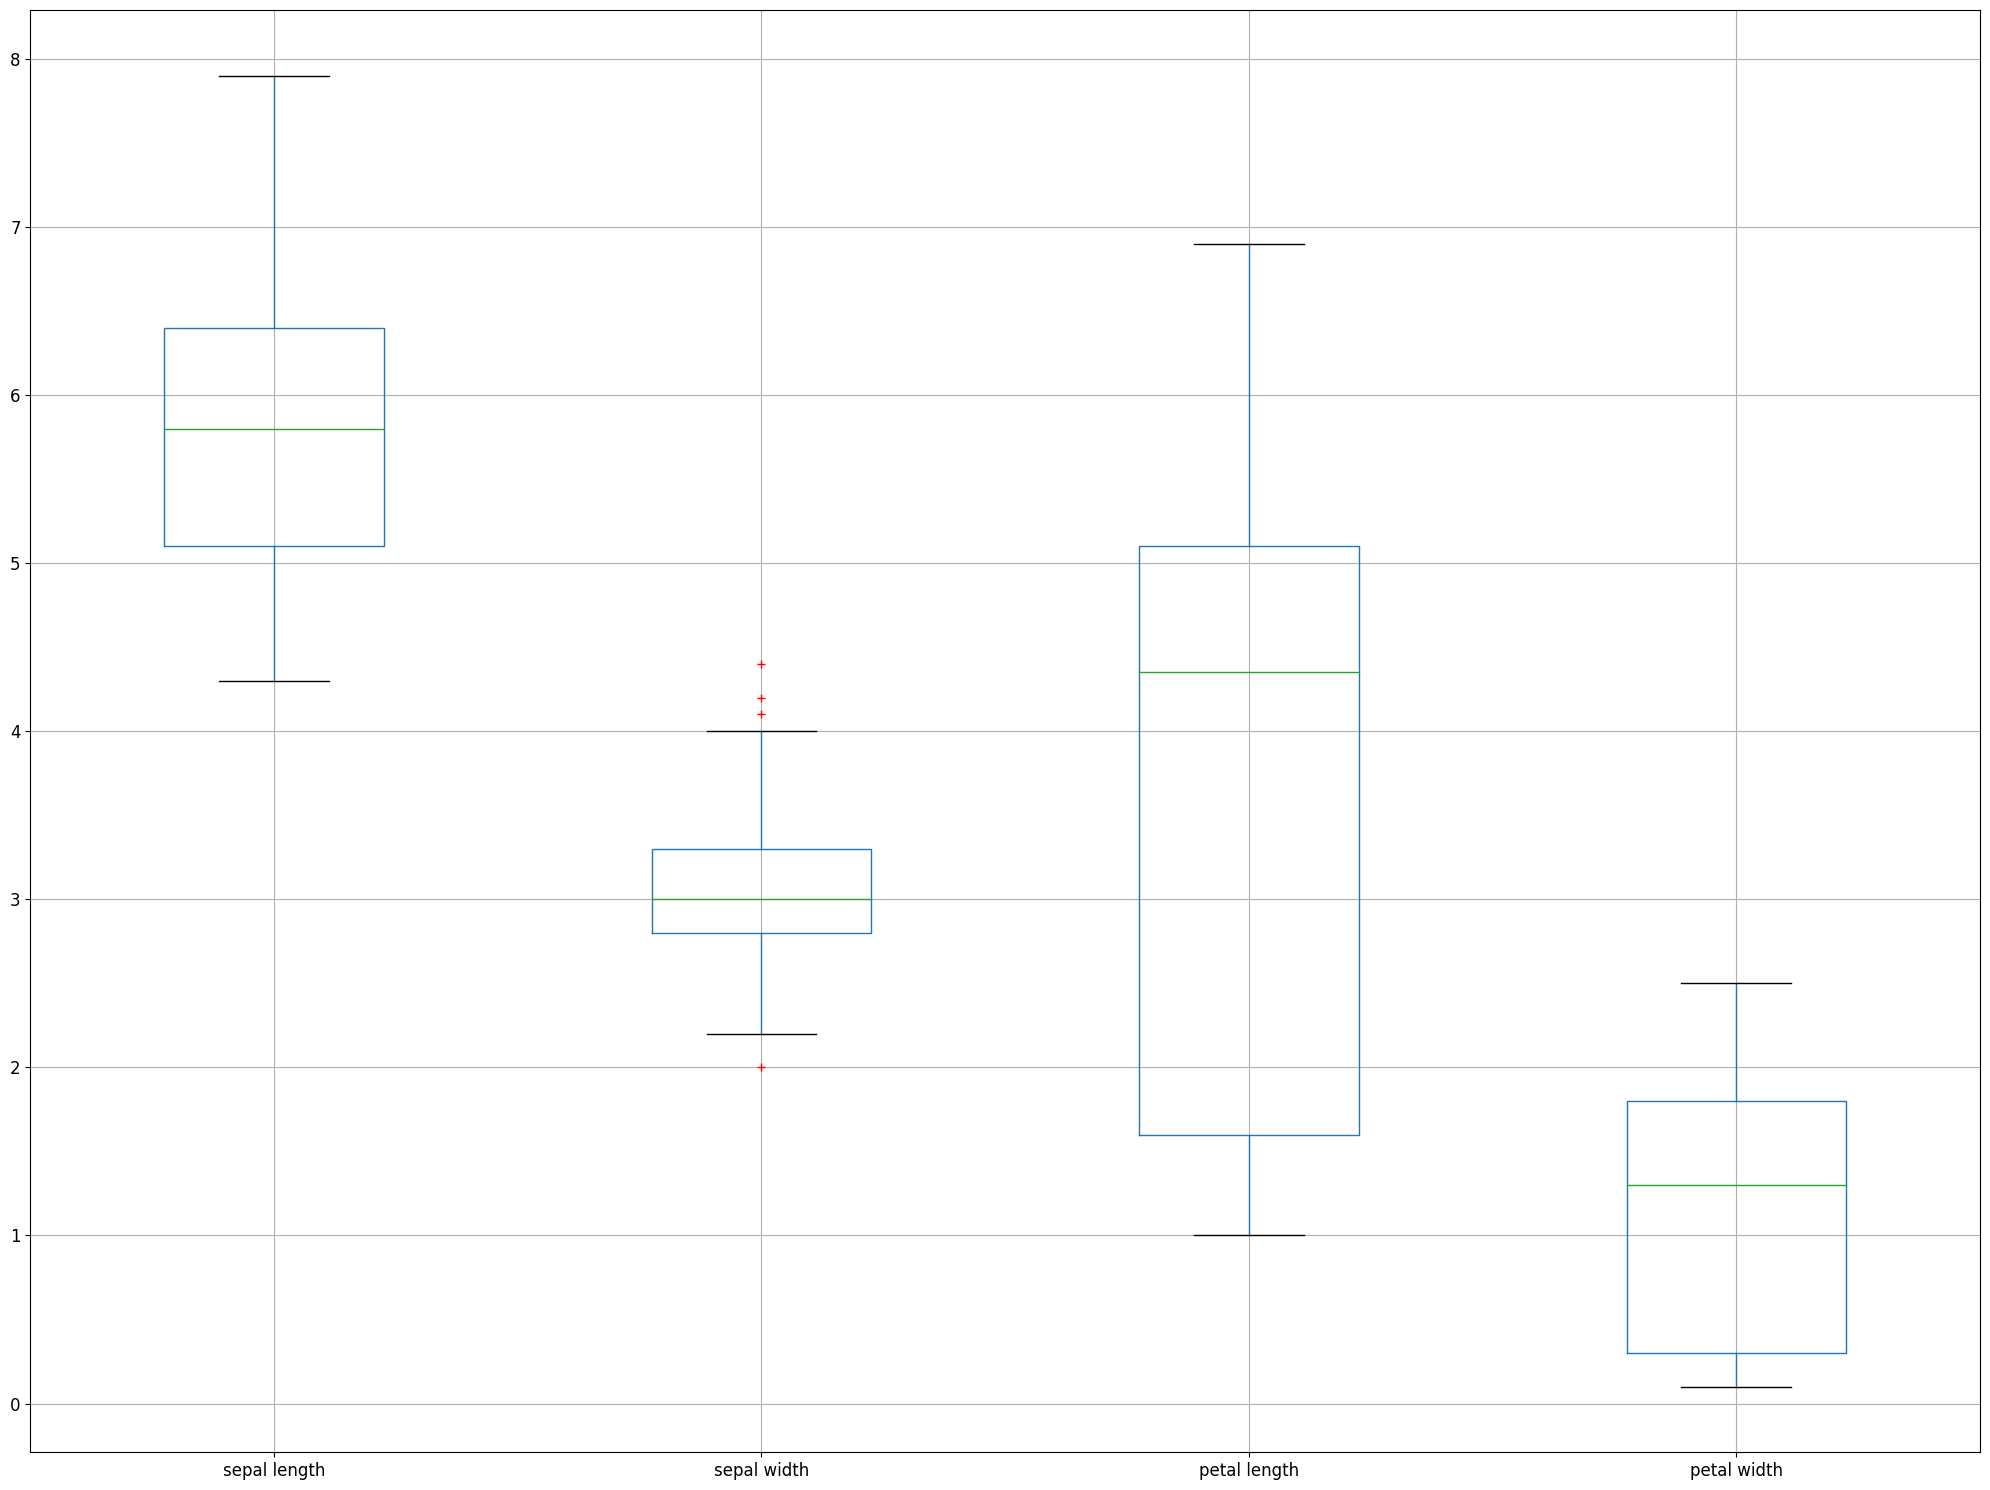

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
df.boxplot(sym='r+', figsize=(20,15))
save_fig("attribute_box_plots")
plt.show()

### Histograms

Saving figure attribute_histogram_plots


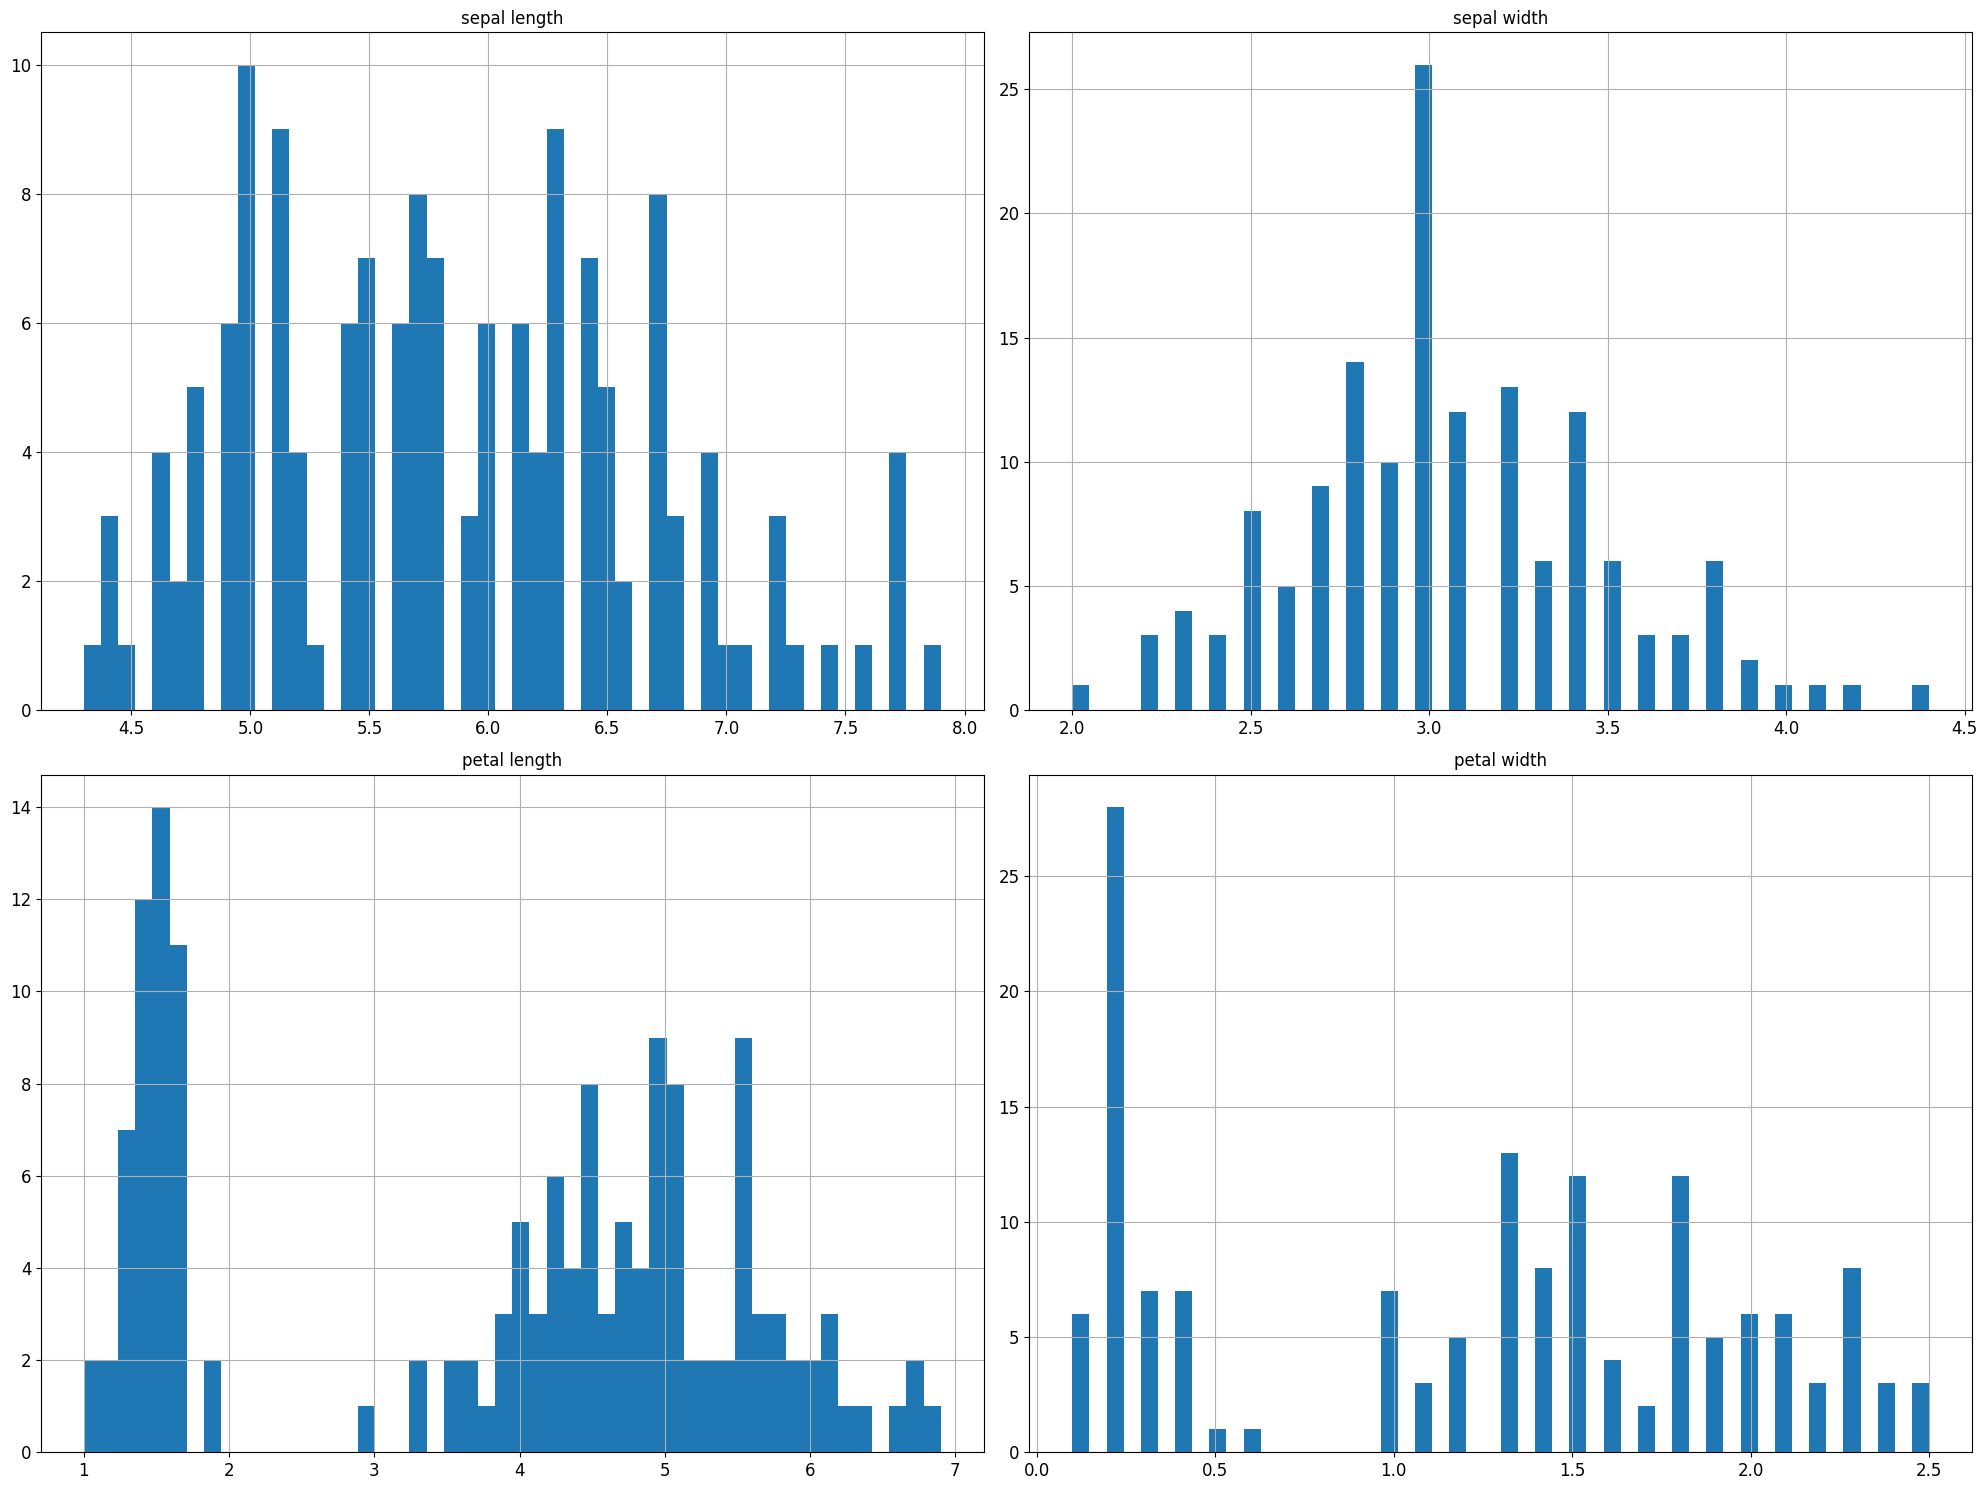

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### Density Plot

Saving figure attribute_density_plots


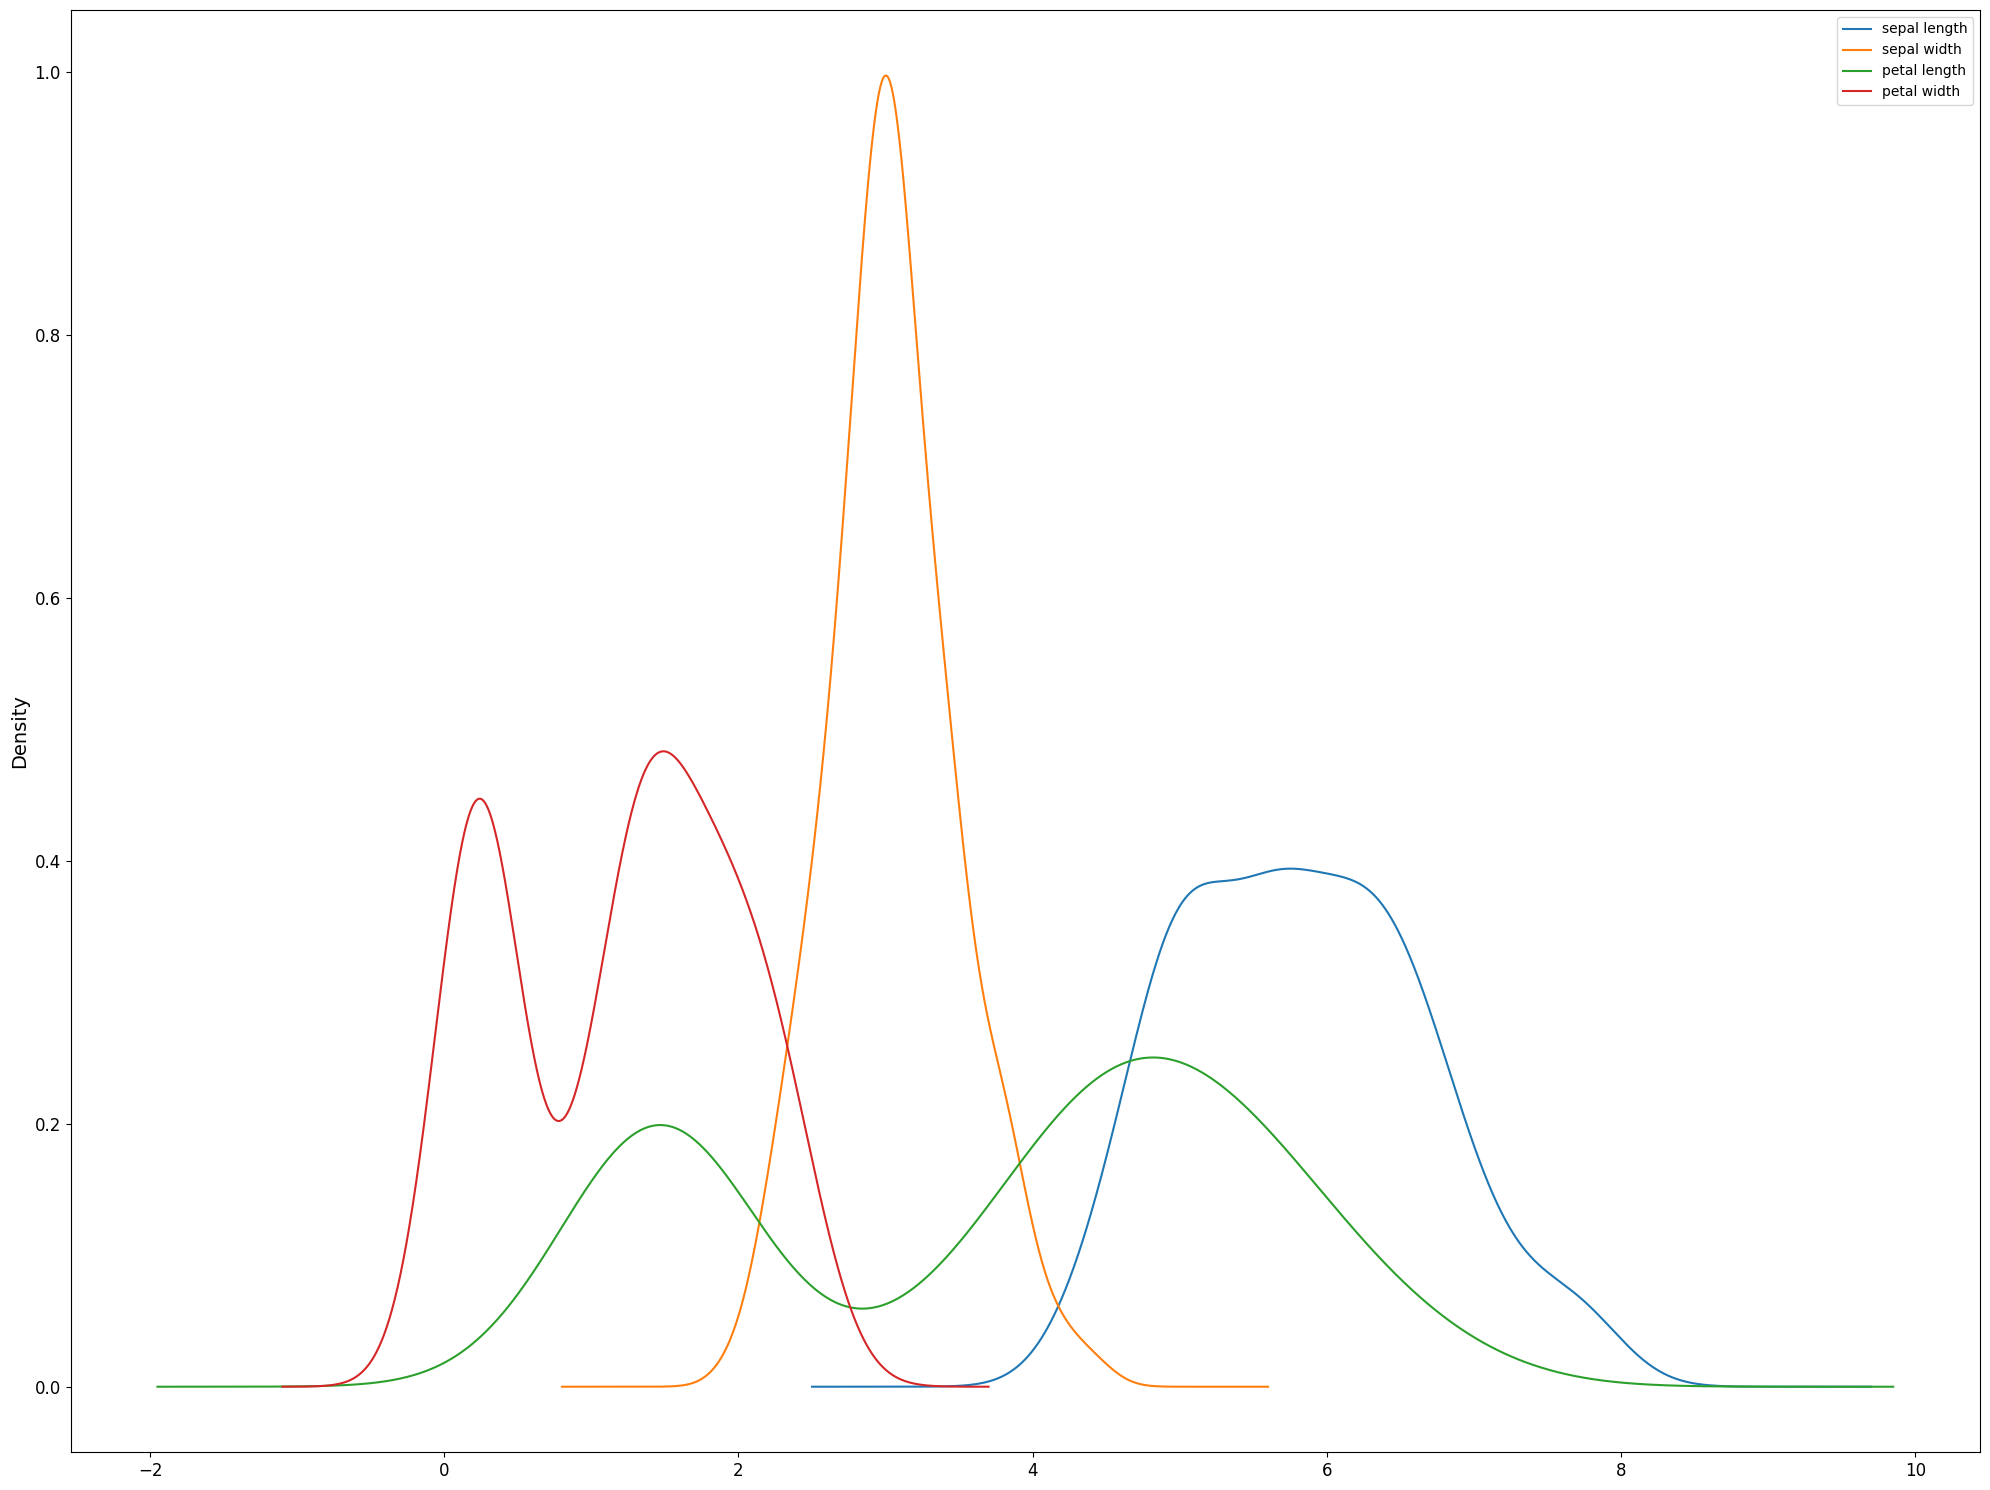

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot.kde(figsize=(20,15))
save_fig("attribute_density_plots")
plt.show()

### Scatter Plot

Saving figure scatter_plots


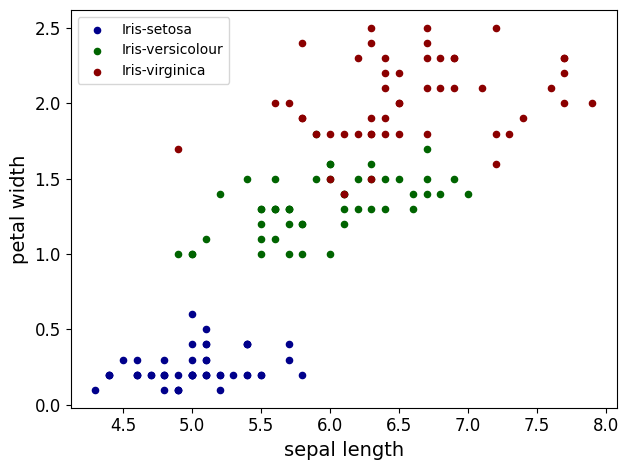

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = df[df['label'] == 'Iris-setosa'].plot.scatter(x='sepal length', y='petal width', color='DarkBlue', label='Iris-setosa')
df[df['label'] == 'Iris-versicolor'].plot.scatter(x='sepal length', y='petal width', color='DarkGreen', label='Iris-versicolour', ax=ax)
df[df['label'] == 'Iris-virginica'].plot.scatter(x='sepal length', y='petal width', color='DarkRed', label='Iris-virginica', ax=ax)
save_fig("scatter_plots")
plt.show()

### Scatter matrix

Saving figure scatter_matrix


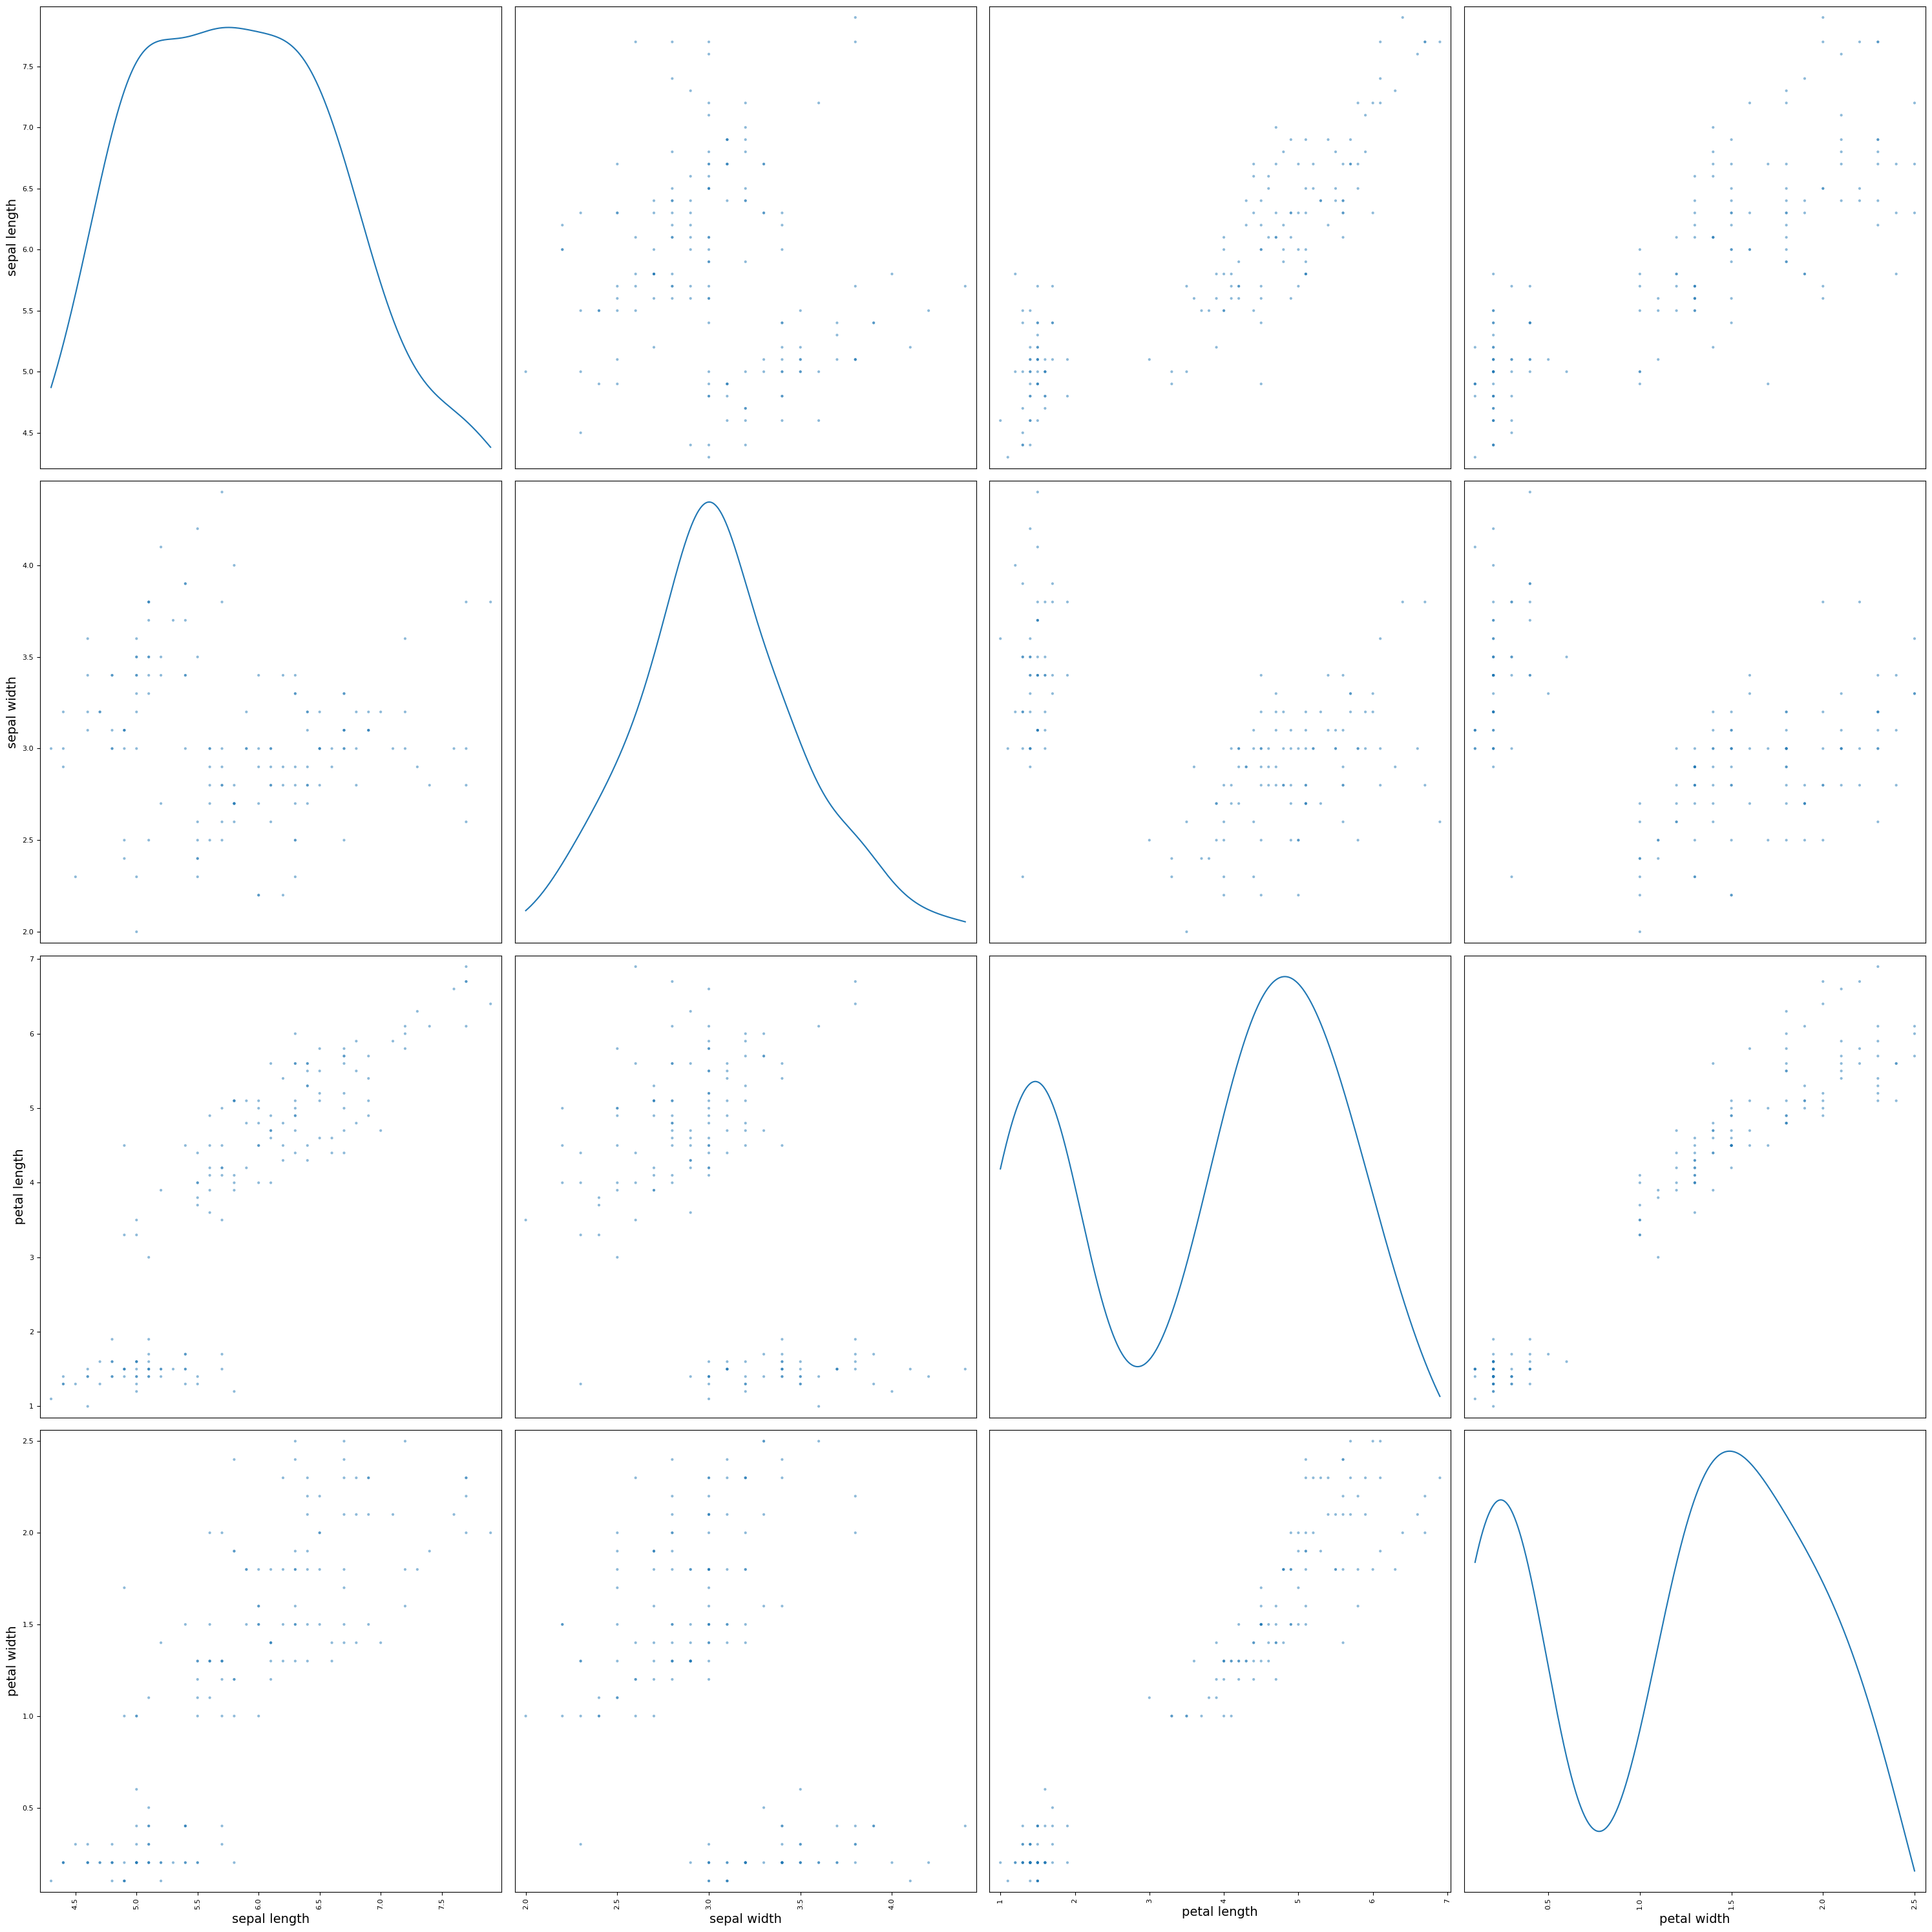

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(30, 30), diagonal='kde')
save_fig("scatter_matrix")
plt.show()

### Bubble Charts

Saving figure bubble_plots


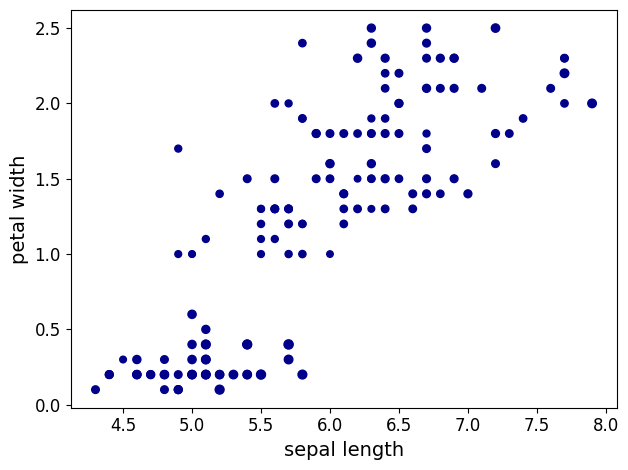

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

df.plot.scatter(x='sepal length', y='petal width', s=df['sepal width'] * 10, color='DarkBlue')
save_fig("bubble_plots")
plt.show()

### Parallel coordinates

Saving figure paralle_coordinates_plots


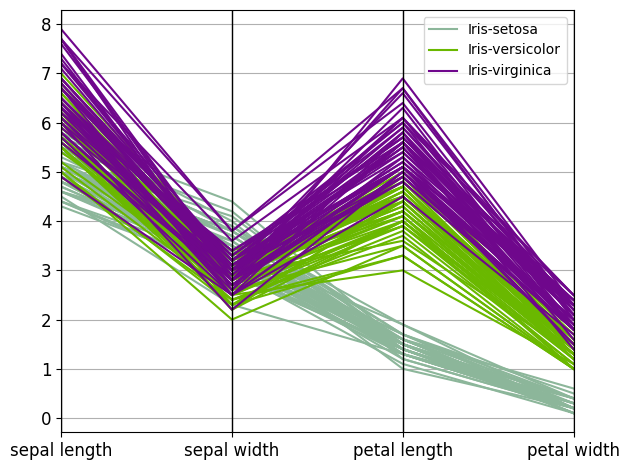

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'label')
save_fig("paralle_coordinates_plots")
plt.show()